http://geologyandpython.com/ML-spatial-data.html

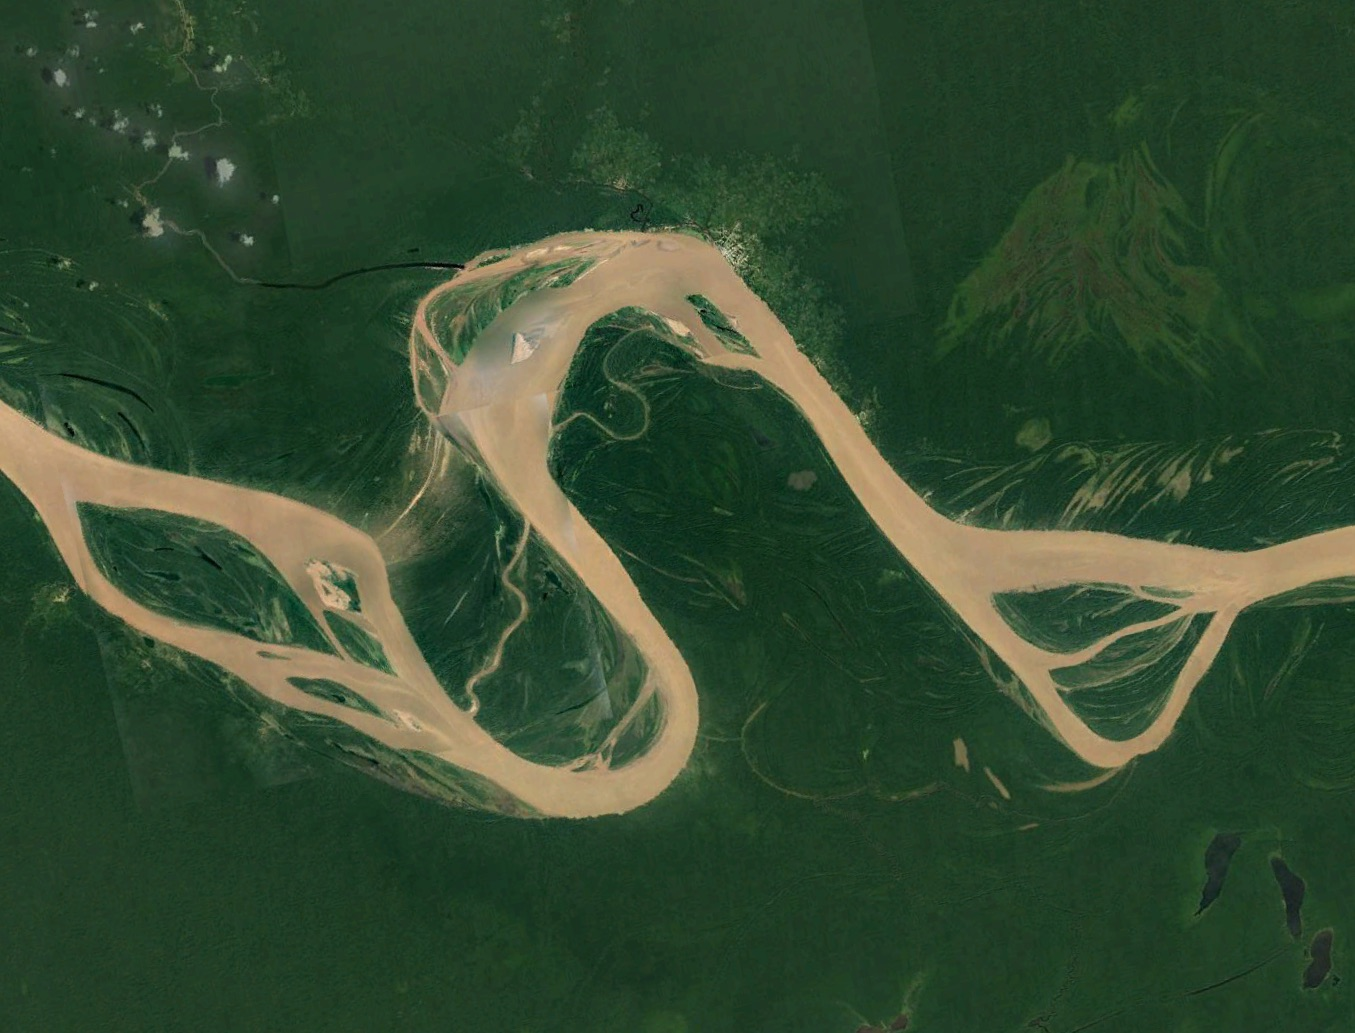

In [5]:
from IPython.display import Image
imfile = '../data/fluvial_satellite_2.jpg'
Image(imfile)

In [6]:
from scipy import misc
import numpy as np

import matplotlib.pyplot as plt

% matplotlib inline

image = misc.imread(imfile)

data = image[...,0]

nrows,mcols = data.shape  # (rows, columns)
nrows,mcols

(1033, 1355)

In [7]:
data = image[...,0]

Text(0,0.5,'Northing (m)')

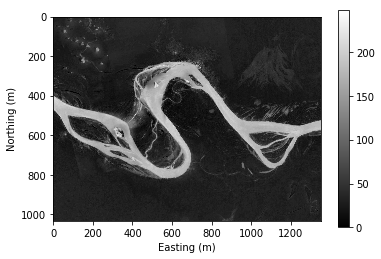

In [11]:
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

Text(0,0.5,'pixel intensity')

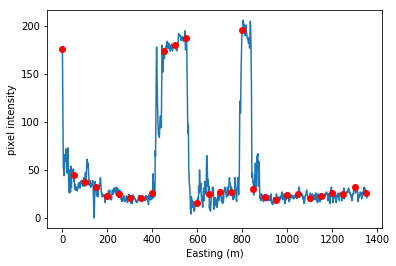

In [12]:
# Extract data at regular grid
p=50
plt.plot(np.arange(len(data[400,:])), data[400,:])
plt.plot(p*np.arange(len(data[400,::p])),data[400,::p],'ro')
plt.xlabel('Easting (m)')
plt.ylabel('pixel intensity')

In [13]:
nrows, mcols

(1033, 1355)

In [14]:
p_hrz, q_hrz = 100, 10 
p_ver, q_ver = 10, 50 

In [15]:
# Make horizontal lines
hrz_x = np.arange(0, mcols, q_hrz)
hrz_y = np.arange(0, nrows, p_hrz)  
xv_hrz, yv_hrz = np.meshgrid(hrz_x, hrz_y)

# Make vertical lines
ver_y = np.arange(0, nrows, p_ver)
ver_x = np.arange(0, mcols, q_ver)  
xv_ver, yv_ver = np.meshgrid(ver_x, ver_y)

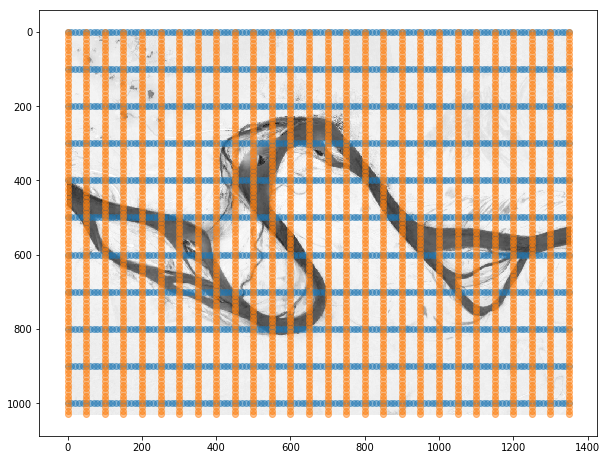

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(data, cmap='Greys')
plt.scatter(xv_hrz, yv_hrz, alpha=0.5)
plt.scatter(xv_ver, yv_ver, alpha=0.5)

In [17]:
xv_hrz, yv_hrz = np.ravel(xv_hrz), np.ravel(yv_hrz)
xv_ver, yv_ver = np.ravel(xv_ver), np.ravel(yv_ver)

xpts, ypts = np.concatenate([xv_hrz, xv_ver]), np.concatenate([yv_hrz, yv_ver])

# Start Exercise Here

# Simple interpolation

tutorial on interpolation

https://github.com/seg/tutorials-2016/blob/master/1604_Function_of_interpolation/The_function_of_interpolation.ipynb

In [18]:
shape = data.shape

In [19]:
from scipy import interpolate 
from scipy.interpolate import interp2d

In [20]:
xpts, ypts

(array([   0,   10,   20, ..., 1250, 1300, 1350]),
 array([   0,    0,    0, ..., 1030, 1030, 1030]))

In [21]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

In [22]:
# initialization of the griding space
domainx = np.arange(800)
domainy =  np.arange(600)
X, Y = np.meshgrid(domainx,domainy)

In [23]:
# Choose npts random point from the discrete domain of our model function
def make_random_points(domainx, domainy, n=500):
    if n > len(domainx):
        n = len(domainx)
    px = np.random.choice(domainx, size = n)
    py = np.random.choice(domainy, size = n)
    return px, py

In [24]:
px, py = make_random_points(domainx, domainy, n=500)

In [25]:
px_new, py_new = decimate_random_points(np.delete(domainx,px), np.delete(domainy,py), n=500)

NameError: name 'decimate_random_points' is not defined

NameError: name 'decimate_random_points' is not defined

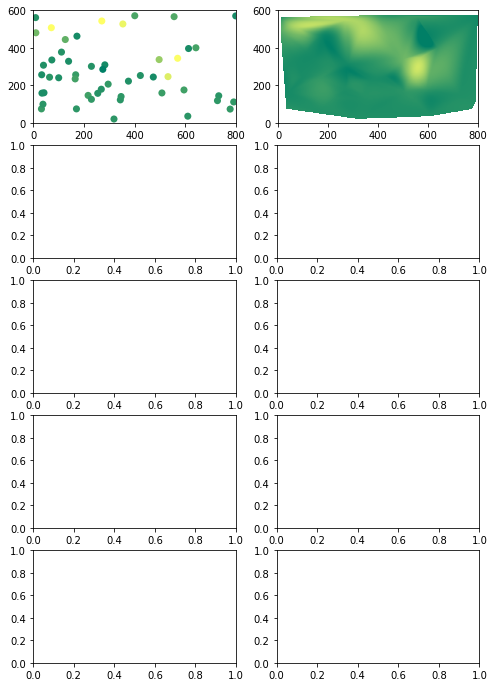

In [26]:
n = 4
dn = np.array([50, 100, 200, 300, 400])

fig, axarr = plt.subplots(len(dn),2)
fig.set_figwidth(8)
fig.set_figheight(12)

for i, n in enumerate(dn):
    all_one_plot = True
    if all_one_plot:
        plot = 0
    else: 
        plot = i

    if i != 0:
        px_new, py_new = decimate_random_points(np.delete(domainx,px), np.delete(domainy,py), n=n*(i+1))
        px, py = np.concatenate([px, px_new]), np.concatenate([py, py_new])
    else: 
         px, py = make_random_points(domainx, domainy, n=(i+1)*n)
            
    axarr[plot,0].scatter(px, py, c=data[py,px], s=50-(10*i), alpha=1.0, marker='o', edgecolor='none', cmap='summer')
    
   
    #axarr[i,0].set_title('Sample points on f(X,Y)')
    axarr[plot,0].set_xlim(domainx[0],domainx[-1]+1)
    axarr[plot,0].set_ylim(domainy[0],domainy[-1]+1)
    Ti = griddata((px, py), data[py,px], (X, Y), method='cubic')
    axarr[plot,1].imshow((Ti), cmap='summer', clim=[0,256],  aspect = 600/800, origin='lower')

In [87]:
axarr[plot,1].

AttributeError: 'AxesSubplot' object has no attribute 'gca'

In [266]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

regrs = [KNeighborsRegressor(),
         #AdaBoostRegressor(),
         ExtraTreesRegressor(),
         RandomForestRegressor()
        ]

#y_fit = mag_array[np.isfinite(mag_array)]
y_fit = data[py,px]

#x_index_fit, y_index_fit = np.where(np.isfinite(mag_array))
x_index_fit, y_index_fit = px, py

#x_index_pred, y_index_pred = np.where(mag_array)
x_index_pred, y_index_pred =  np.meshgrid(np.arange(801), np.arange(601))
x_index_pred, y_index_pred = np.ndarray.flatten(x_index_pred), np.ndarray.flatten(y_index_pred)

X_fit = MinMaxScaler().fit_transform(np.vstack([px, py]).T)
X_pred = MinMaxScaler().fit_transform(np.vstack([x_index_pred, y_index_pred]).T)



/Applications/anaconda/envs/caml/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


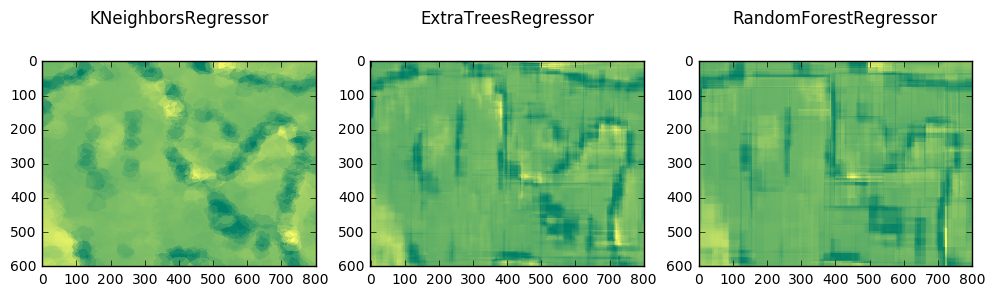

In [267]:
fig, axes = plt.subplots(1, 3, figsize=(12,6))
for ax, regr, title in zip(axes.ravel(),
                          regrs,
                          ['KNeighborsRegressor', 
                           #'AdaBoostRegressor', 
                           'ExtraTreesRegressor', 
                           'RandomForestRegressor']):

    regr.fit(X=X_fit, y=y_fit)
    y_pred = regr.predict(X=X_pred)

    ax.imshow(y_pred.reshape(shape), cmap='summer') #,  extent=extent) #, vmin=vmin, vmax=vmax)
    ax.set_title(title, y=1.15)
    
#  Truth
show_rbf = False
if show_rbf:
    axes[-1,-1].imshow(zi.T, cmap='summer') 
    axes[-1,-1].set_title('RBF', y=1.15)   